<a href="https://colab.research.google.com/github/LuizFernando-RO/find-roots/blob/main/%5Bcolab%5D%20Find_Roots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def delta(a, b, c):
  ''' Funcao para calcular o delta de uma equacao do segundo grau
  '''
  return (b**2)-4*a*c

def x(a, b, c):
  ''' Funcao para calcular as raizes de uma equacao do segundo grau
  '''
  # delta
  D = delta(a, b, c)
  if D < 0:
    return gr.update(value='No real roots', visible=True), gr.update(value='', visible=False), gr.update(value='', visible=False)

  # raiz com delta positivo
  x1 = (-b + D**(1/2))/(2*a)

  if D == 0:
    return gr.update(value='Single root', visible=True), gr.update(value=x1,visible=True), gr.update(value='', visible=False)

  # raiz com delta negativo
  x2 = (-b - D**(1/2))/(2*a)

  return gr.update(value='Two roots', visible=True), gr.update(value=x1, visible=True), gr.update(value=x2, visible=True)

def plot(a, b, c, x1, x2):
  '''Funcao para plotar o grafico da funcao quadradica dada por
  ax**2+bx+c com raizes x1 e x2
  As raizes, caso existam, sao destacadas como pontos vermelhos
  '''
  if x2 is not None:
    space = np.linspace(x1-10,x2+10,500)
  else:
    space = np.linspace(x1-10,x1+10,500)

  data = [a*i**2+b*i+c for i in space]

  fig, ax = plt.subplots()
  plt.plot(space,data)
  if x1 is not None:
    plt.plot(x1,0,'ro')
  if x2 is not None:
    plt.plot(x2,0,'ro')
  plt.plot(space,space*0,'k-')
  plt.plot(space*0,np.linspace(min(data)-5,max(data)+5,500),'k-')
  plt.grid()
  return fig

def solve_equation(equation):
  ''' Funcao para resolver uma equacao do segundo grau
  '''
  # pre-processamento: transformar equacao na forma:
  # Ax^2+Bx+C

  # removendo todos os espacos em branco
  equation = equation.strip()
  equation = equation.replace(' ', '')
  # transformando simbolo de potenciacao
  equation = equation.replace('**', '^')
  # removendo simbolo de multiplicacao
  equation = equation.replace('*', '')

  # se nao houver o termo quadratico, equacao esta incorreta
  if 'x^2' not in equation:
    return gr.update(visible=False),gr.update(visible=False),gr.update(visible=False),'Invalid equation',gr.update(visible=False),gr.update(visible=False),gr.update(visible=False)
  spl1 = equation.split('x^2')

  # avaliando valor de A
  if not spl1[0]:
    a = 1.
  elif spl1[0] == '-':
    a = -1.
  else:
    a = float(spl1[0])

  # avaliando valores de B e C
  spl2 = spl1[1].split('x')
  if len(spl2) == 1:
    b = 0.
    if not spl2[0]:
      c = 0.
    else:
      c = float(spl2[0])
  else:
    if spl2[0] == '-':
      b = -1.
    elif spl2[0] == '+':
      b = 1.
    else:
      b = float(spl2[0])
    if not spl2[1]:
      c = 0.
    else:
      c = float(spl2[1])
  print(a, b, c)

  message, x1, x2 = x(a, b, c)

  # plotando grafico apenas se pelo menos uma raiz
  if message['value'] == 'No real roots':
    grafico = gr.update(visible=False)
  elif message['value'] == 'Single root':
    grafico = gr.update(value=plot(a, b, c, float(x1['value']), None), visible=True)
  else:
    grafico = gr.update(value=plot(a, b, c, float(x1['value']), float(x2['value'])), visible=True)
  return gr.update(value=f'{a}', visible=True), gr.update(value=f'{b}', visible=True), gr.update(value=f'{c}', visible=True), message, x1, x2, grafico

# solve_equation("x**2+x+1")

In [ ]:
with gr.Blocks() as demo:
  output = []
  equation = gr.Textbox(label='Equation')
  solve_button = gr.Button('Solve')
  with gr.Row():
    A = gr.Number(label='A', visible=False)
    B = gr.Number(label='B', visible=False)
    C = gr.Number(label='C',visible=False)
  message = gr.Textbox(label="Message", visible=False)
  solution1 = gr.Textbox(label="Root #1", visible=False)
  solution2 = gr.Textbox(label="Root #2", visible=False)
  grafico = gr.Plot(label="Equation Plot", visible=False)
  solve_button.click(fn=solve_equation, inputs=equation, outputs=[A, B, C, message, solution1, solution2, grafico], api_name="2nd-solver")

demo.launch(debug=True)

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://fecd2801cbecda5997.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


1.0 0.0 0.0
0.0 None
5.0 -3.0 2.0


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 1698, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

5.0 -18.0 2.0
3.4852299546352716 0.1147700453647282


Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/gradio/queueing.py", line 759, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 2191, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gradio/blocks.py", line 1698, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/anyio/to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
           ^^^^^

3.0 2.0 7.0
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7889 <> https://fecd2801cbecda5997.gradio.live


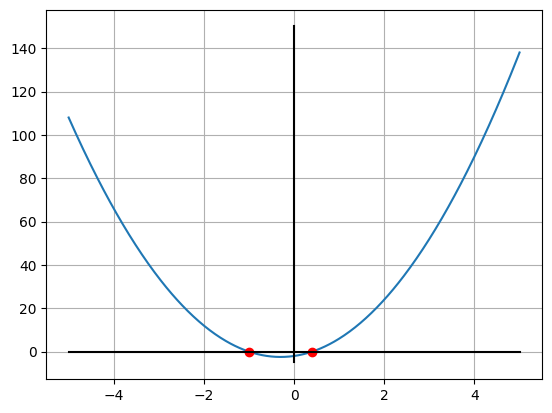

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

a = 5
b = 3
c = -2

data = [a*i**2+b*i+c for i in np.linspace(-5,5,500)]

fig, ax = plt.subplots()
plt.plot(np.linspace(-5,5,500),data)
plt.plot(-1,0,'ro')
plt.plot(0.4,0,'ro')
plt.plot(np.linspace(-5,5,500),np.linspace(-5,5,500)*0,'k-')
plt.plot(np.linspace(-5,5,500)*0,np.linspace(-5,150,500),'k-')
plt.grid()
plt.show()

In [ ]:
data

[np.float64(108.0),
 np.float64(107.0601242565291),
 np.float64(106.12426456118654),
 np.float64(105.19242091397224),
 np.float64(104.26459331488628),
 np.float64(103.34078176392863),
 np.float64(102.42098626109937),
 np.float64(101.50520680639836),
 np.float64(100.5934433998257),
 np.float64(99.68569604138135),
 np.float64(98.78196473106536),
 np.float64(97.88224946887765),
 np.float64(96.98655025481824),
 np.float64(96.09486708888723),
 np.float64(95.20719997108446),
 np.float64(94.32354890141004),
 np.float64(93.44391387986393),
 np.float64(92.56829490644617),
 np.float64(91.6966919811567),
 np.float64(90.82910510399554),
 np.float64(89.96553427496276),
 np.float64(89.10597949405826),
 np.float64(88.25044076128208),
 np.float64(87.3989180766342),
 np.float64(86.55141144011472),
 np.float64(85.70792085172349),
 np.float64(84.8684463114606),
 np.float64(84.03298781932601),
 np.float64(83.2015453753198),
 np.float64(82.37411897944186),
 np.float64(81.55070863169223),
 np.float64(80.731